In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)
#mouse_df.head()
#clinical_trial_df.head()

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_trial_df, on="Mouse ID")
#combined_df.head()

# Display the data table for preview

combined_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

combined_group_df = combined_df.groupby(["Drug","Timepoint"])


combined_group_df["Tumor Volume (mm3)"].mean()
mean_vol = combined_group_df["Tumor Volume (mm3)"].mean()


mean_vol_df = combined_group_df.mean().reset_index()

In [132]:
mean_vol_df = mean_vol_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
mean_vol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_group_df["Tumor Volume (mm3)"].sem()
se_tumor_vol = combined_group_df["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
se_tumor_vol_df = combined_group_df.sem().reset_index()

# Preview DataFrame
se_tumor_vol_df = se_tumor_vol_df[["Timepoint","Drug","Tumor Volume (mm3)"]]
se_tumor_vol_new = se_tumor_vol_df.rename(columns={"Tumor Volume (mm3)": "Std. Error of Tumor Volumes"})
se_tumor_vol_new


,Timepoint,Drug,Std. Error of Tumor Volumes
0,0,Capomulin,0.000000
1,5,Capomulin,0.448593
2,10,Capomulin,0.702684
3,15,Capomulin,0.838617
4,20,Capomulin,0.909731
...,...,...,...
95,25,Zoniferol,0.602513
96,30,Zoniferol,0.800043
97,35,Zoniferol,0.881426
98,40,Zoniferol,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

mean_vol_pivot = mean_vol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
se_vol_pivot = se_tumor_vol_new.pivot(index="Timepoint", columns="Drug", values="Std. Error of Tumor Volumes")
se_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


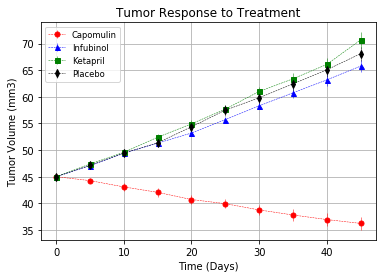

In [7]:
# Generate the Plot (with Error Bars)
color = "r"
marker = "o"
columns = []

for column in mean_vol_pivot:
    if column == "Capomulin" or column == "Infubinol" or column == "Ketapril" or column == "Placebo":
        
        if column == "Infubinol":
            color = "b"
            marker = "^"
        if column == "Ketapril":
            color = "g"
            marker = "s"
        if column == "Placebo":
            color = "k"
            marker = "d"
        x_axis = mean_vol_pivot.index
        y_axis = mean_vol_pivot[column]
    
        columns.append(column)
        yerr = se_vol_pivot[column]
    
        plt.errorbar(x_axis, y_axis, yerr, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        

plt.legend(columns,loc="best",fontsize="small",fancybox=True)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

    
# Save the Figure

plt.savefig("tumor_response_to_treatment.png")
plt.show()


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = combined_group_df["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_mean_df = combined_group_df.mean().reset_index()

# Preview DataFrame
met_site_mean_df = met_site_mean_df[["Timepoint","Drug","Metastatic Sites"]]
met_site_mean_df

,Timepoint,Drug,Metastatic Sites
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174
...,...,...,...
95,25,Zoniferol,1.687500
96,30,Zoniferol,1.933333
97,35,Zoniferol,2.285714
98,40,Zoniferol,2.785714


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
met_site_se_df = combined_group_df.sem().reset_index()

# Preview DataFrame
met_site_se_df = met_site_se_df[["Timepoint", "Drug", "Metastatic Sites"]]
met_site_se_df

,Timepoint,Drug,Metastatic Sites
0,0,Capomulin,0.000000
1,5,Capomulin,0.074833
2,10,Capomulin,0.125433
3,15,Capomulin,0.132048
4,20,Capomulin,0.161621
...,...,...,...
95,25,Zoniferol,0.236621
96,30,Zoniferol,0.248168
97,35,Zoniferol,0.285714
98,40,Zoniferol,0.299791


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
mean_vol_pivot = mean_vol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
mean_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot = met_site_mean_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
se_met_pivot = met_site_se_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
se_met_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


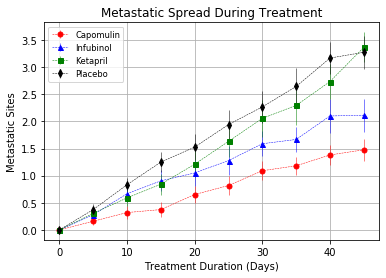

In [13]:
# Generate the Plot (with Error Bars)
color = "r"
marker = "o"
columns = []

for column in mean_met_pivot:
    if column == "Capomulin" or column == "Infubinol" or column == "Ketapril" or column == "Placebo":
        
        if column == "Infubinol":
            color = "b"
            marker = "^"
        if column == "Ketapril":
            color = "g"
            marker = "s"
        if column == "Placebo":
            color = "k"
            marker = "d"
        x_axis = mean_met_pivot.index
        y_axis = mean_met_pivot[column]
    
        columns.append(column)
        yerr = se_met_pivot[column]
    
        plt.errorbar(x_axis, y_axis, yerr, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.legend(columns,loc="best",fontsize="small",fancybox=True)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(True)
        
# Save the Figure

plt.savefig("meta_spread_during_treatment.png")
plt.show()

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_group_df["Mouse ID"].count()


# Convert to DataFrame
mice_count_df = combined_group_df.count().reset_index()

# Preview DataFrame
mice_count_df = mice_count_df[["Timepoint", "Drug", "Mouse ID"]]
mice_count_df = mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})
mice_count_df

,Timepoint,Drug,Mouse Count
0,0,Capomulin,25
1,5,Capomulin,25
2,10,Capomulin,25
3,15,Capomulin,24
4,20,Capomulin,23
...,...,...,...
95,25,Zoniferol,16
96,30,Zoniferol,15
97,35,Zoniferol,14
98,40,Zoniferol,14


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.pivot(index="Timepoint",columns="Drug",values="Mouse Count")

# Preview the Data Frame
mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


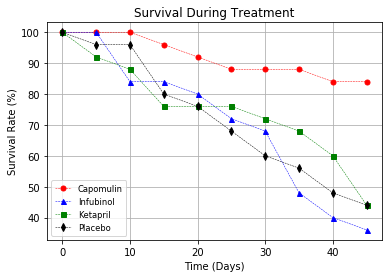

In [16]:
# Generate the Plot (Accounting for percentages)

color = "r"
marker = "o"
columns = []

for column in mice_count_pivot:
    if column == "Capomulin" or column == "Infubinol" or column == "Ketapril" or column == "Placebo":
        
        if column == "Infubinol":
            color = "b"
            marker = "^"
        if column == "Ketapril":
            color = "g"
            marker = "s"
        if column == "Placebo":
            color = "k"
            marker = "d"
        x_axis = mice_count_pivot.index
        y_axis = ((mice_count_pivot[column])/25)*100
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.legend(columns,loc="best",fontsize="small",fancybox=True)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)

# Save the Figure

plt.savefig("survival_during_treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [186]:
mean_vol_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
# Calculate the percent changes for each drug
perc_change = []
pc_columns = []

for column in mean_vol_pivot:
    perc_change_x = (((mean_vol_pivot[column][45])-(mean_vol_pivot[column][0]))/(mean_vol_pivot[column][0]))*100
    perc_change.append(perc_change_x)
    pc_columns.append(column)

# Display the data to confirm
print(perc_change)
print(pc_columns)

[-19.475302667894173, 42.51649185589744, 46.12347172785187, 57.028794686606076, 53.92334713476923, 51.29796048315153, 47.24117486320637, -22.320900462766673, 52.085134287899024, 46.57975086509525]
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [18]:
perc_change_df = pd.DataFrame(list(zip(pc_columns,perc_change)),columns=["Drug","Percent Change"])
perc_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [34]:
perc_change_df_new = perc_change_df.drop([1,4,6,7,8,9],axis=0)

perc_change_df_new

,Drug,Percent Change
0,Capomulin,-19.475303
2,Infubinol,46.123472
3,Ketapril,57.028795
5,Placebo,51.297960


Rectangle(xy=(-0.4, 0), width=0.8, height=-19.4753, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=46.1235, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=57.0288, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=51.298, angle=0)


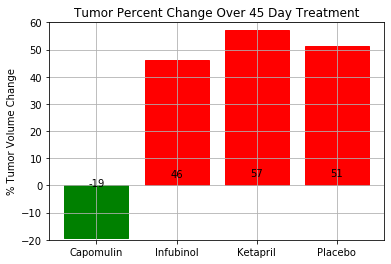

In [33]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls



x_axis = perc_change_df_new["Drug"]
y_axis = perc_change_df_new["Percent Change"]
fig,ax = plt.subplots()

bar_graph = ax.bar(x_axis,y_axis)

bar_graph[0].set_color("g")
bar_graph[1].set_color("r")
bar_graph[2].set_color("r")
bar_graph[3].set_color("r")

plt.ylim(-20,60)
plt.grid(True)
plt.yticks

plt.title("Tumor Percent Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


def autolabel(y_axis):
    # attach some text labels
    for y in y_axis:
        print(y)
        height = y.get_height()

        ax.text(y.get_x() + y.get_width()/2., .05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(bar_graph)

# Save the Figure
plt.savefig("summary_bar_graph.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)